#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [42]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [43]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [44]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [45]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [46]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [48]:
model = Sequential()

In [49]:
#卷積層1

In [50]:
model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))

In [51]:
model.add(Dropout(rate=0.25))

In [52]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [53]:
#卷積層2與池化層2

In [54]:
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))

In [55]:
model.add(Dropout(0.25))

In [56]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [57]:
#建立神經網路(平坦層、隱藏層、輸出層)

In [58]:
model.add(Flatten())
model.add(Dropout(rate=0.25))

In [59]:
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

In [60]:
model.add(Dense(10, activation='softmax'))

In [61]:
#檢查model 的STACK
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

# 載入之前訓練的模型

In [62]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def compile_model (loss_function) :
    model.compile(loss=loss_function, optimizer='sgd', metrics=['accuracy'])

    train_history = model.fit(x_img_train_normalize, y_label_train_OneHot, 
                             validation_split=0.25, epochs=10, batch_size=128, verbose=1)
    print('keys =', train_history.history.keys())
    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()
    
    scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
    print('accuracy =',scores[1])

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 106s 3ms/step - loss: 1.6336 - accuracy: 0.4154 - val_loss: 1.6600 - val_accuracy: 0.4523
Epoch 2/10
37500/37500 [==============================] - 104s 3ms/step - loss: 1.5702 - accuracy: 0.4372 - val_loss: 1.6173 - val_accuracy: 0.4601
Epoch 3/10
37500/37500 [==============================] - 103s 3ms/step - loss: 1.5162 - accuracy: 0.4588 - val_loss: 1.5678 - val_accuracy: 0.4781
Epoch 4/10
37500/37500 [==============================] - 103s 3ms/step - loss: 1.4791 - accuracy: 0.4697 - val_loss: 1.5082 - val_accuracy: 0.5017
Epoch 5/10
37500/37500 [==============================] - 105s 3ms/step - loss: 1.4417 - accuracy: 0.4842 - val_loss: 1.4688 - val_accuracy: 0.5126
Epoch 6/10
37500/37500 [==============================] - 105s 3ms/step - loss: 1.4167 - accuracy: 0.4921 - val_loss: 1.4616 - val_accuracy: 0.5173
Epoch 7/10
37500/37500 [==============================] - 107s

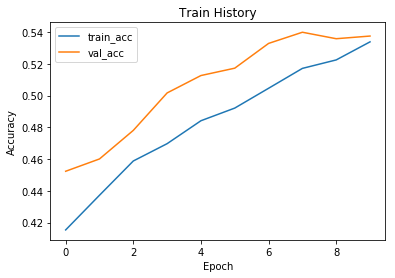

10000/10000 [==============================] - 6s 590us/step
accuracy = 0.5449000000953674


In [79]:
compile_model('categorical_crossentropy')

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 112s 3ms/step - loss: 0.0591 - accuracy: 0.5461 - val_loss: 0.0619 - val_accuracy: 0.5546
Epoch 2/10
37500/37500 [==============================] - 104s 3ms/step - loss: 0.0591 - accuracy: 0.5461 - val_loss: 0.0617 - val_accuracy: 0.5565
Epoch 3/10
37500/37500 [==============================] - 104s 3ms/step - loss: 0.0591 - accuracy: 0.5454 - val_loss: 0.0616 - val_accuracy: 0.5578
Epoch 4/10
37500/37500 [==============================] - 107s 3ms/step - loss: 0.0590 - accuracy: 0.5460 - val_loss: 0.0614 - val_accuracy: 0.5574
Epoch 5/10
37500/37500 [==============================] - 103s 3ms/step - loss: 0.0589 - accuracy: 0.5441 - val_loss: 0.0614 - val_accuracy: 0.5590
Epoch 6/10
37500/37500 [==============================] - 103s 3ms/step - loss: 0.0588 - accuracy: 0.5471 - val_loss: 0.0613 - val_accuracy: 0.5598
Epoch 7/10
37500/37500 [==============================] - 107s

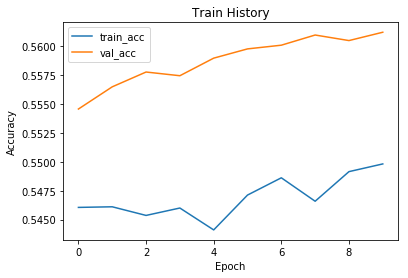

10000/10000 [==============================] - 6s 589us/step
accuracy = 0.5648000240325928


In [81]:
compile_model('mean_squared_error')

Train on 37500 samples, validate on 12500 samples
Epoch 1/10
37500/37500 [==============================] - 110s 3ms/step - loss: 0.1987 - accuracy: 0.9222 - val_loss: 0.2091 - val_accuracy: 0.9166
Epoch 2/10
37500/37500 [==============================] - 103s 3ms/step - loss: 0.1983 - accuracy: 0.9220 - val_loss: 0.2082 - val_accuracy: 0.9171
Epoch 3/10
37500/37500 [==============================] - 100s 3ms/step - loss: 0.1977 - accuracy: 0.9225 - val_loss: 0.2076 - val_accuracy: 0.9174
Epoch 4/10
37500/37500 [==============================] - 105s 3ms/step - loss: 0.1976 - accuracy: 0.9225 - val_loss: 0.2075 - val_accuracy: 0.9174
Epoch 5/10
37500/37500 [==============================] - 104s 3ms/step - loss: 0.1973 - accuracy: 0.9227 - val_loss: 0.2070 - val_accuracy: 0.9175
Epoch 6/10
37500/37500 [==============================] - 108s 3ms/step - loss: 0.1966 - accuracy: 0.9229 - val_loss: 0.2066 - val_accuracy: 0.9179
Epoch 7/10
37500/37500 [==============================] - 112s

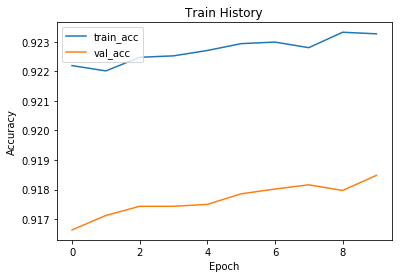

10000/10000 [==============================] - 5s 521us/step
accuracy = 0.918610155582428


In [82]:

compile_model('binary_crossentropy')